In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
x = dataset.iloc[:, 1:2].values  # It is good to make x as a matrix and y as vector 
y = dataset.iloc[:, 2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [6]:
x = sc_x.fit_transform(x)

# The need of the below is to convert 1D to 2D because in the feature scaling takes 2D array
y = np.ravel(sc_y.fit_transform(y.reshape(-1, 1)))

/Users/riju/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Fitting SVR to the dataset

from sklearn.svm import SVR

In [8]:
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

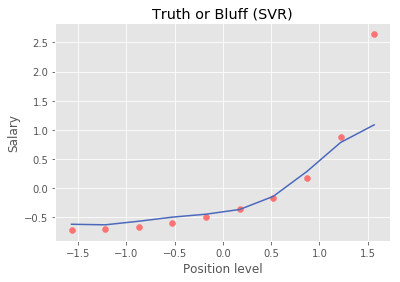

In [12]:
# Visualising the SVR result

plt.scatter(x, y, color='#FD7272')
plt.plot(x, regressor.predict(x), color='#4a69bd')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting a new result
# We need to inverse it because we will get a scaled value and it will be inverse using sc_y object because 
# we are predicting y values using x values

sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

array([ 170370.0204065])